In [101]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
dihed ='A'
current_dir = "/home/sanderroet/forcefield_test/cut_off_all_bonds/dihed_"+dihed+"/"
dihed_file = current_dir+"dihed.xvg"
energy_file = current_dir+"energy.xvg"

xtc = current_dir + 'vis-dihedral.xtc'
pdb = current_dir + 'vis-dihedral.pdb'
traj = md.load(xtc, top = pdb)
    

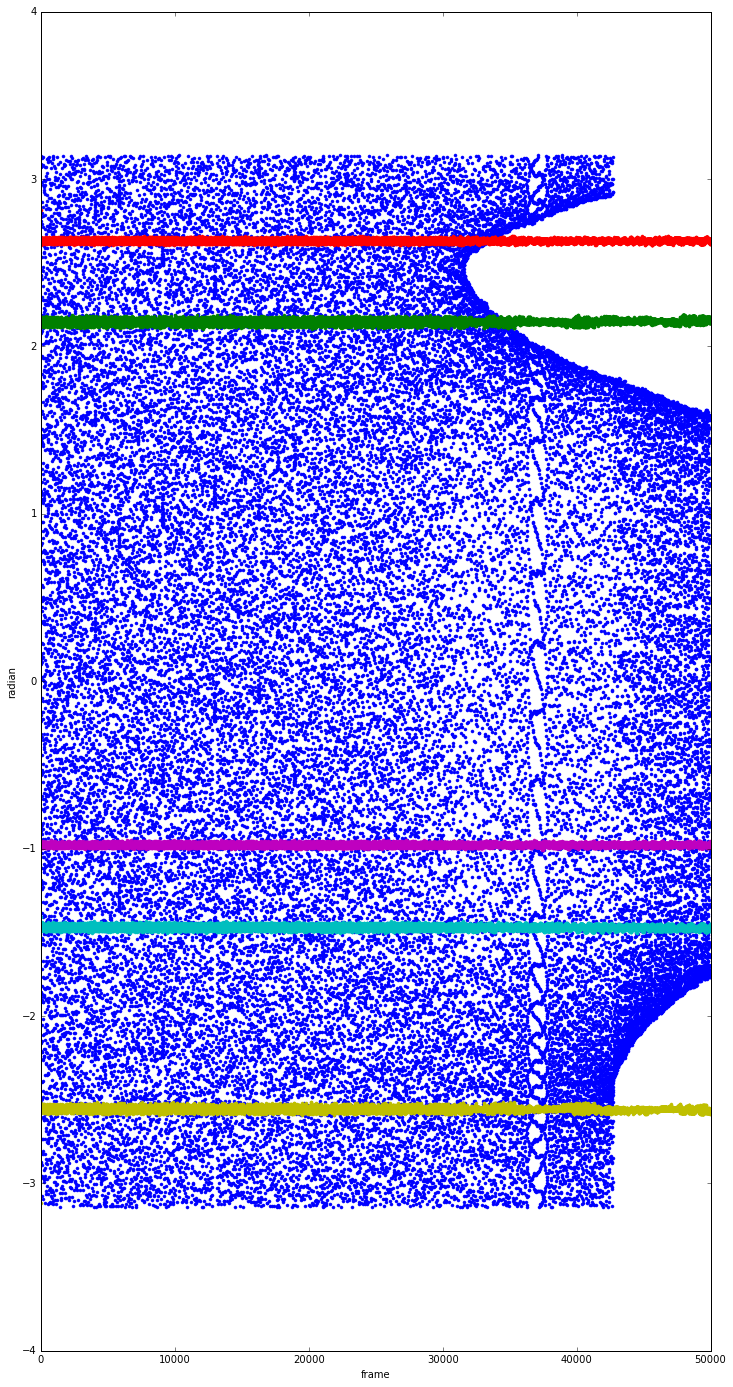

In [102]:
fig = plt.figure(figsize=(12,24))
(plot_line,) = plt.plot(md.compute_dihedrals(traj, [[15,13,12,9]]), '.')
(plot_line,) = plt.plot(md.compute_dihedrals(traj, [[2,0,4,5]]), '.')
(plot_line,) = plt.plot(md.compute_dihedrals(traj, [[9,8,5,4]]), '.')
(plot_line,) = plt.plot(md.compute_dihedrals(traj, [[5,8,9,12]]), '.')
(plot_line,) = plt.plot(md.compute_dihedrals(traj, [[13,12,9,8]]), '.')
(plot_line,) = plt.plot(md.compute_dihedrals(traj, [[0,4,5,8]]), '.')

#plt.xlim(0, 1000)
plt.xlabel('frame')
plt.ylabel('radian')

In [103]:
f_energy = open(energy_file, 'r') 
f_dihed  = open(dihed_file, 'r')
energy= {}
dihed_energy = [[] for x in range(0,361)]
lim = 1000
i = 0
for line in f_energy:
    if line[0] != '#' and line[0] != '@' :#and i < lim:
        energy.update({round(float(line.split()[0]),2):(float(line.split()[1]))})#-float(line.split()[1]))})
        i+=1
i = 0
for line in f_dihed:
    if line[0] != '#' and line[0] != '@' :#and i < lim: 
        dihed_energy[int(round(float(line.split()[1])+180))].append(energy[round(float(line.split()[0]),2)])
        i+=1


f_energy.close()
f_dihed.close()

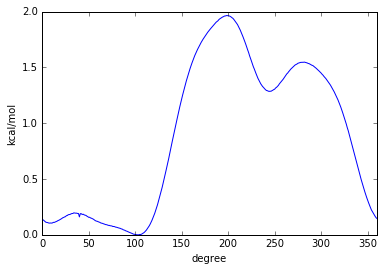

In [105]:
data = []
mult = 1
if dihed == 'A' or dihed == 'B':
    mult = 3
elif dihed == 'F':
    mult = 2
mult =1 
for i in dihed_energy:
    
    #print(i)
    if i != []:
        #i = [abs(z) for z in i]
        data.append(np.mean(i)*mult)
    else:
        data.append(float('nan'))
        
#print(data)
data_min = min(data)
#print (data_min)
data = data - data_min
data = data*0.238902957618615
fig = plt.figure()
temp = -180
shift_data = list(data[temp:])+list(data[:temp])
(plot_line,) = plt.plot(data)
#(plot_line,) = plt.plot(shift_data)

if dihed == 'A':
    plt.xlim(0,360)
elif dihed == 'B':
    plt.xlim(0,175)
elif dihed == 'C':
    plt.xlim(360-280,360-80)
elif dihed == 'D':
    plt.xlim(0,360)
elif dihed == 'E':
    plt.xlim(360-300,360-50)
elif dihed == 'F':
    temp = -180
    shift_data = list(data[temp:])+list(data[:temp])
    (plot_line,) = plt.plot(shift_data)
plt.xlabel('degree')
plt.ylabel('kcal/mol')